## Data

### 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../data/train_data.csv'
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}

train_data = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
train_data = train_data.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)
train_data

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [3]:
DATA_PATH = '../data/test_data.csv'
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}

test_data = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
test_data = test_data.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)
test_data

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


### 시퀀스 개수

In [4]:
len(train_data.groupby(['userID','testId']))

365164

In [5]:
len(test_data.groupby(['userID','testId']))

42025

### train_data와 test_data에서 겹치는 userID & testId

In [6]:
users_train = set(list(train_data['userID'].unique()))
users_test = set(list(test_data['userID'].unique()))
len(users_train & users_test)

0

In [7]:
tests_train = set(list(train_data['testId'].unique()))
tests_test = set(list(test_data['testId'].unique()))
len(tests_train | tests_test), len(tests_train & tests_test)

(1537, 1537)

### testID 분리, Time 생성

In [8]:
df = train_data.copy()

In [9]:
df['question'] = df['assessmentItemID'].apply(lambda x: x[1:])
df['testID'] = df['assessmentItemID'].apply(lambda x: x[1:7])
df['testID1'] = df['assessmentItemID'].apply(lambda x: x[1:4])
df['testID2'] = df['assessmentItemID'].apply(lambda x: x[4:7])
df['testNum'] = df['assessmentItemID'].apply(lambda x: x[7:])
df['KnowledgeTag'] = df['KnowledgeTag'].astype('str')
df['Time'] = (df.groupby(['userID','testID'])['Timestamp'].shift(-1) - df['Timestamp']).apply(lambda x: x.seconds)
df['Time'] = df['Time'].ffill().astype('int')
df = df[['userID','question','testID','testID1','testID2','testNum','KnowledgeTag','Timestamp','Time','answerCode']]
df

,userID,question,testID,testID1,testID2,testNum,KnowledgeTag,Timestamp,Time,answerCode
0,0,060001001,060001,060,001,001,7224,2020-03-24 00:17:11,3,1
1,0,060001002,060001,060,001,002,7225,2020-03-24 00:17:14,8,1
2,0,060001003,060001,060,001,003,7225,2020-03-24 00:17:22,7,1
3,0,060001004,060001,060,001,004,7225,2020-03-24 00:17:29,7,1
4,0,060001005,060001,060,001,005,7225,2020-03-24 00:17:36,11,1
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,030071005,030071,030,071,005,438,2020-06-05 06:50:21,24,0
2266582,7441,040165001,040165,040,165,001,8836,2020-08-21 01:06:39,11,1
2266583,7441,040165002,040165,040,165,002,8836,2020-08-21 01:06:50,46,1
2266584,7441,040165003,040165,040,165,003,8836,2020-08-21 01:07:36,73,1


### 데이터 정보

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   userID        int16         
 1   question      object        
 2   testID        object        
 3   testID1       object        
 4   testID2       object        
 5   testNum       object        
 6   KnowledgeTag  object        
 7   Timestamp     datetime64[ns]
 8   Time          int64         
 9   answerCode    int8          
dtypes: datetime64[ns](1), int16(1), int64(1), int8(1), object(6)
memory usage: 144.8+ MB


In [11]:
df.isnull().sum()

userID          0
question        0
testID          0
testID1         0
testID2         0
testNum         0
KnowledgeTag    0
Timestamp       0
Time            0
answerCode      0
dtype: int64

## EDA

### Features

#### testID 별 개수 시각화

In [12]:
df['testID'].value_counts()

testID
080128    3960
080131    3640
090015    3624
090011    3616
090009    3616
          ... 
010168     180
010178     176
010181     176
010166     176
010179     172
Name: count, Length: 1537, dtype: int64

In [13]:
print(df['testID'].nunique())
df['testID'].unique()

1537


array(['060001', '060003', '060005', ..., '010178', '010189', '010180'],
      dtype=object)

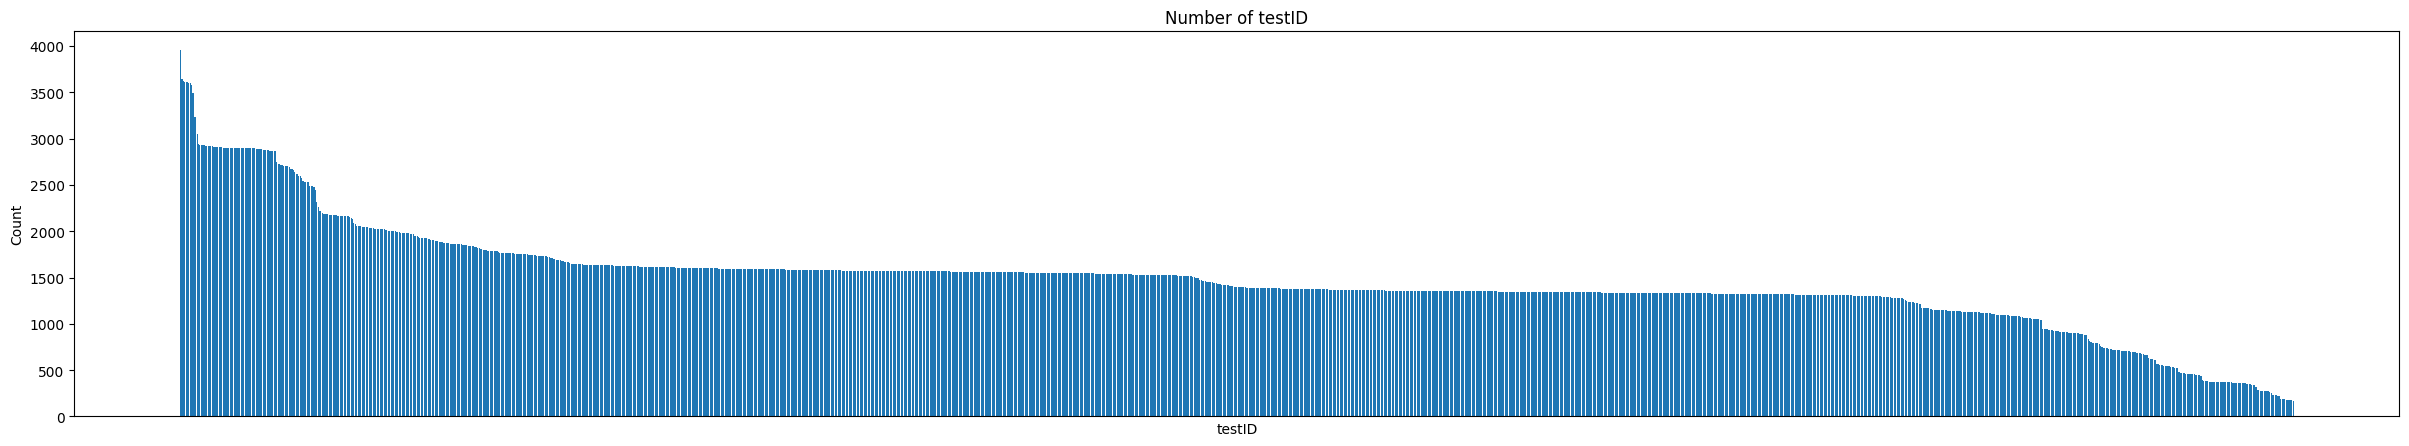

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(df['testID'].value_counts().index, df['testID'].value_counts())
ax.set_title('Number of testID')
ax.set_xlabel('testID')
ax.set_ylabel('Count')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

#### testID 대분류 별 개수 시각화

In [15]:
df['testID1'].value_counts()

testID1
070    279164
050    275773
030    273762
010    272082
020    268327
040    267323
060    264434
080    246336
090    119385
Name: count, dtype: int64

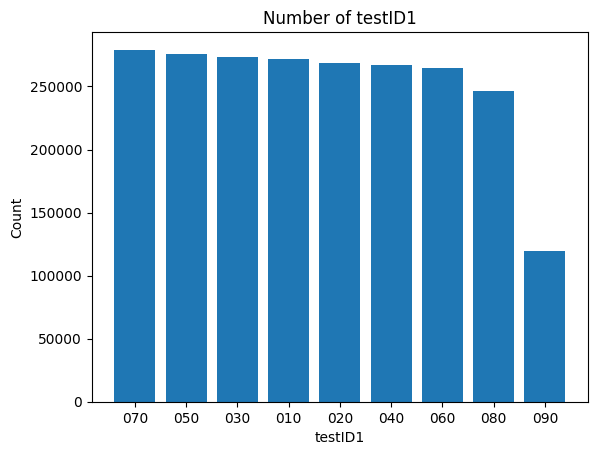

In [16]:
fig, ax = plt.subplots()
plt.bar(df['testID1'].value_counts().index, df['testID1'].value_counts())
ax.set_title('Number of testID1')
ax.set_xlabel('testID1')
ax.set_ylabel('Count')
plt.show()

#### testID 소분류 별 개수 시각화

In [17]:
df['testID2'].value_counts()

testID2
017    17739
009    17555
011    17029
003    16970
007    16826
       ...  
180     3767
197     2973
194     2596
196     1304
198      951
Name: count, Length: 198, dtype: int64

In [18]:
print(df['testID2'].nunique())
df['testID2'].unique()

198


array(['001', '003', '005', '007', '002', '009', '016', '004', '006',
       '018', '020', '008', '010', '022', '012', '014', '024', '031',
       '033', '035', '037', '039', '041', '043', '036', '052', '054',
       '038', '056', '058', '060', '040', '062', '042', '070', '072',
       '074', '044', '076', '078', '046', '048', '085', '087', '089',
       '091', '093', '094', '095', '096', '097', '080', '099', '082',
       '101', '084', '103', '086', '105', '088', '107', '090', '092',
       '098', '172', '121', '100', '123', '125', '102', '174', '181',
       '127', '129', '182', '131', '183', '119', '115', '192', '108',
       '112', '114', '118', '120', '128', '013', '015', '017', '019',
       '021', '049', '051', '063', '065', '073', '075', '081', '083',
       '011', '023', '025', '026', '034', '027', '028', '029', '030',
       '032', '050', '047', '155', '156', '068', '157', '158', '064',
       '066', '160', '059', '161', '162', '163', '164', '165', '104',
       '184', '106',

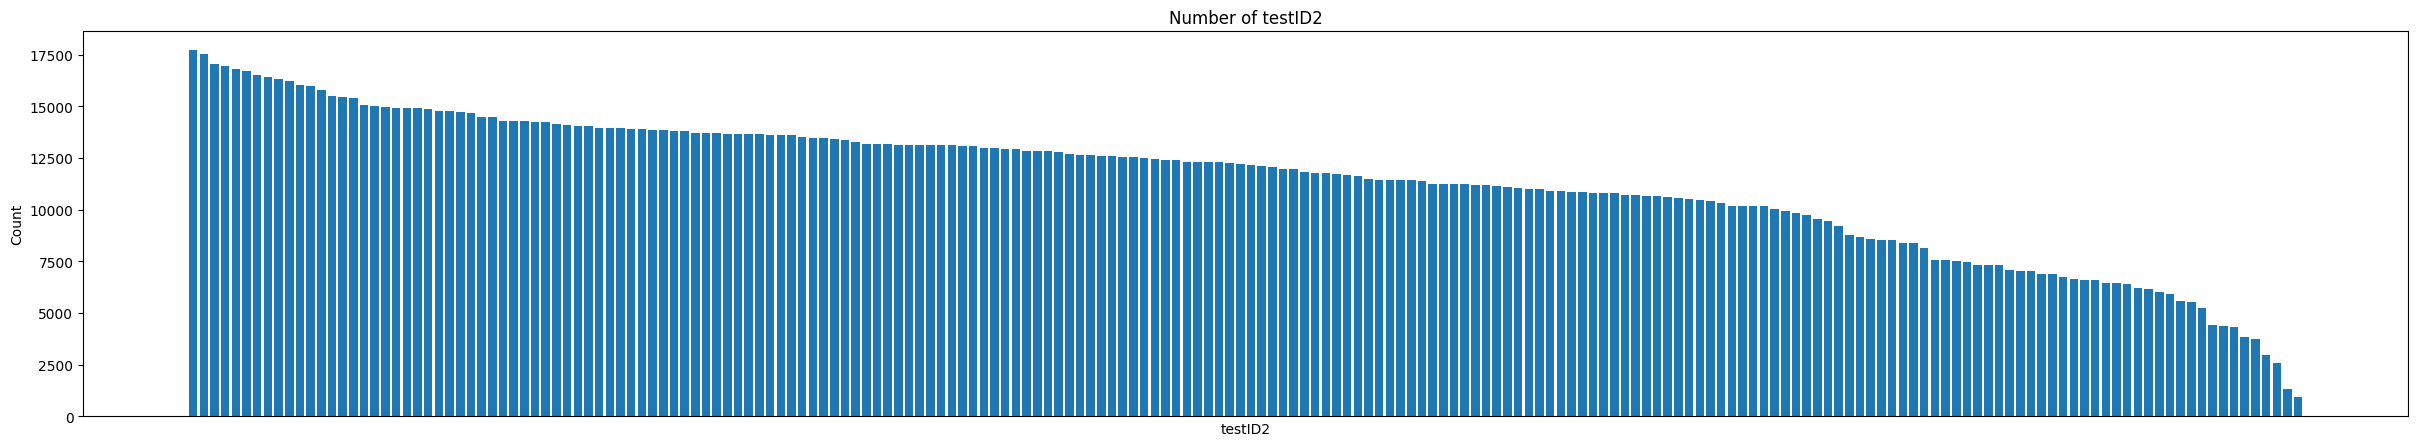

In [19]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(df['testID2'].value_counts().index, df['testID2'].value_counts())
ax.set_title('Number of testID2')
ax.set_xlabel('testID2')
ax.set_ylabel('Count')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

#### testID 개수 vs 대분류/소분류 조합 개수

In [20]:
print(df['testID'].nunique())
print(len(df['testID1'].unique())*len(df['testID2'].unique()))

1537
1782


#### testNum 별 개수 시각화

In [21]:
df['testNum'].value_counts()

testNum
001    371755
003    371640
002    370972
004    369705
005    360607
006    197772
007    127121
008     67150
009     18417
010      5342
011      3352
012      2484
013       269
Name: count, dtype: int64

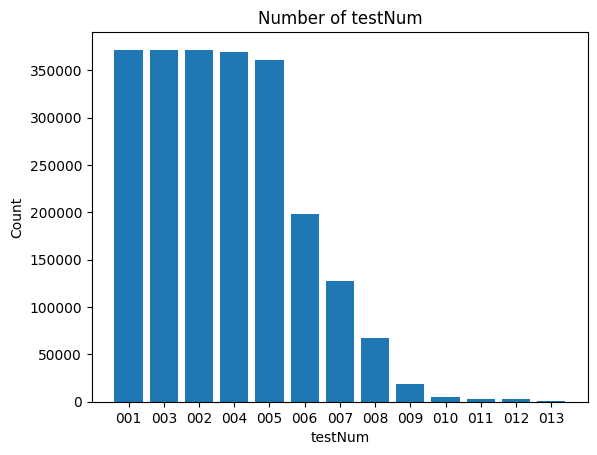

In [22]:
fig, ax = plt.subplots()
plt.bar(df['testNum'].value_counts().index, df['testNum'].value_counts())
ax.set_title('Number of testNum')
ax.set_xlabel('testNum')
ax.set_ylabel('Count')
plt.show()

#### KnowledgeTag 별 개수 시각화

In [23]:
df['KnowledgeTag'].value_counts()

KnowledgeTag
7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: count, Length: 912, dtype: int64

In [24]:
print(df['KnowledgeTag'].nunique())
# df['KnowledgeTag'].unique()

912


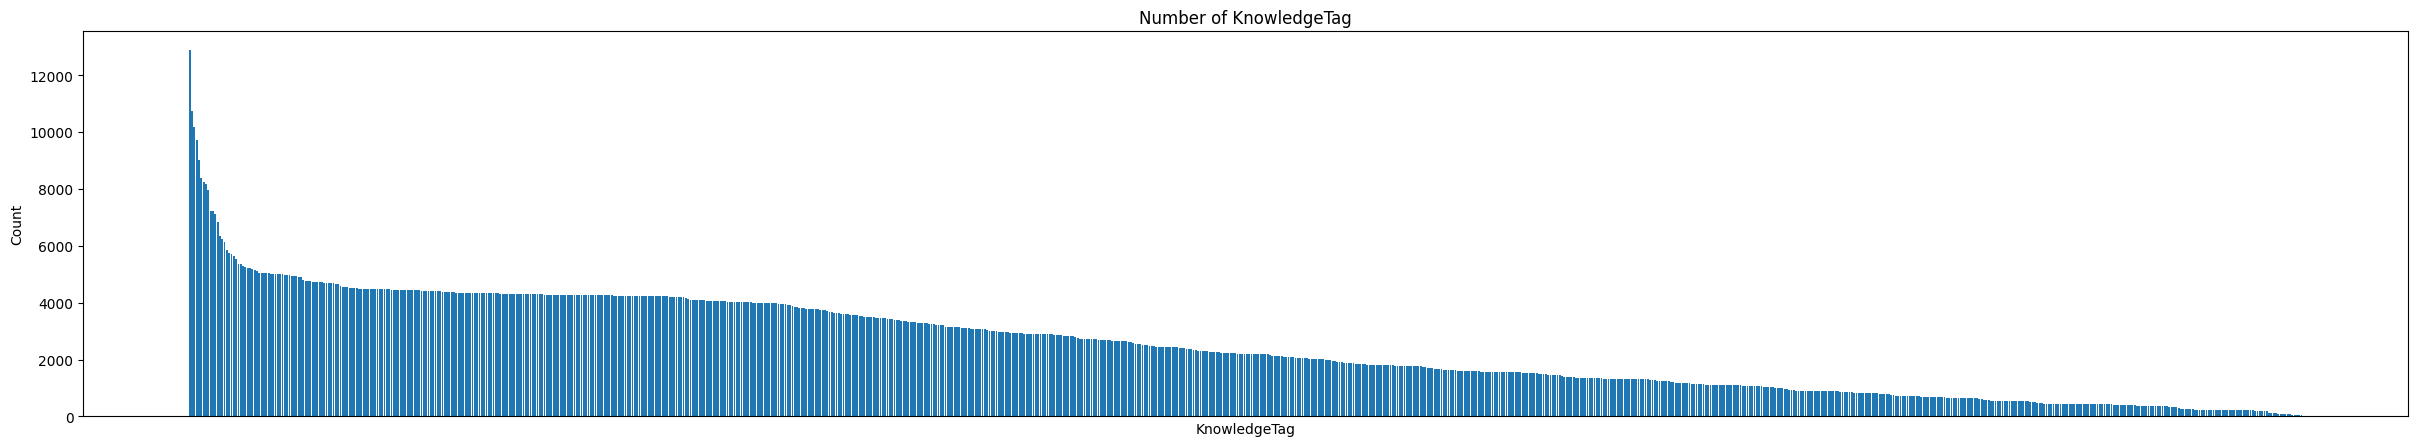

In [25]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(df['KnowledgeTag'].value_counts().index, df['KnowledgeTag'].value_counts())
ax.set_title('Number of KnowledgeTag')
ax.set_xlabel('KnowledgeTag')
ax.set_ylabel('Count')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

### testID 별 정답률

In [26]:
def percentile(s):
    return np.sum(s) / len(s)

In [27]:
testID_groupby = df.groupby('testID').agg({
    'userID': 'count',
    'answerCode': percentile
})
testID_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


In [28]:
testID_groupby

,userID,answerCode
testID,,
010001,1585,0.926183
010002,1550,0.931613
010003,1615,0.846440
010004,1540,0.883117
010005,1595,0.855172
...,...,...
090070,344,0.418605
090071,360,0.336111
090072,270,0.418519


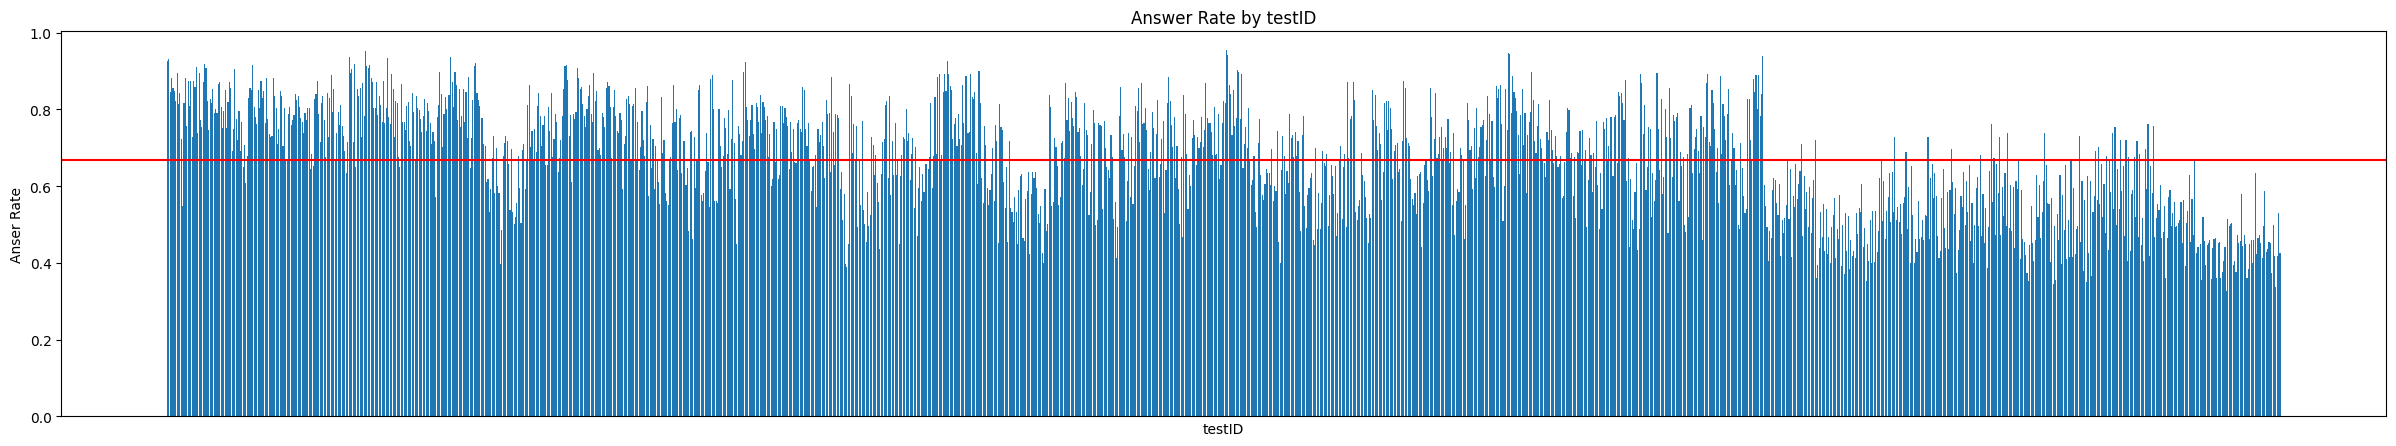

In [29]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(testID_groupby.index, testID_groupby['answerCode'])
ax.set_title('Answer Rate by testID')
ax.set_xlabel('testID')
ax.set_ylabel('Anser Rate')
ax.axhline(testID_groupby['answerCode'].mean(), color='red')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

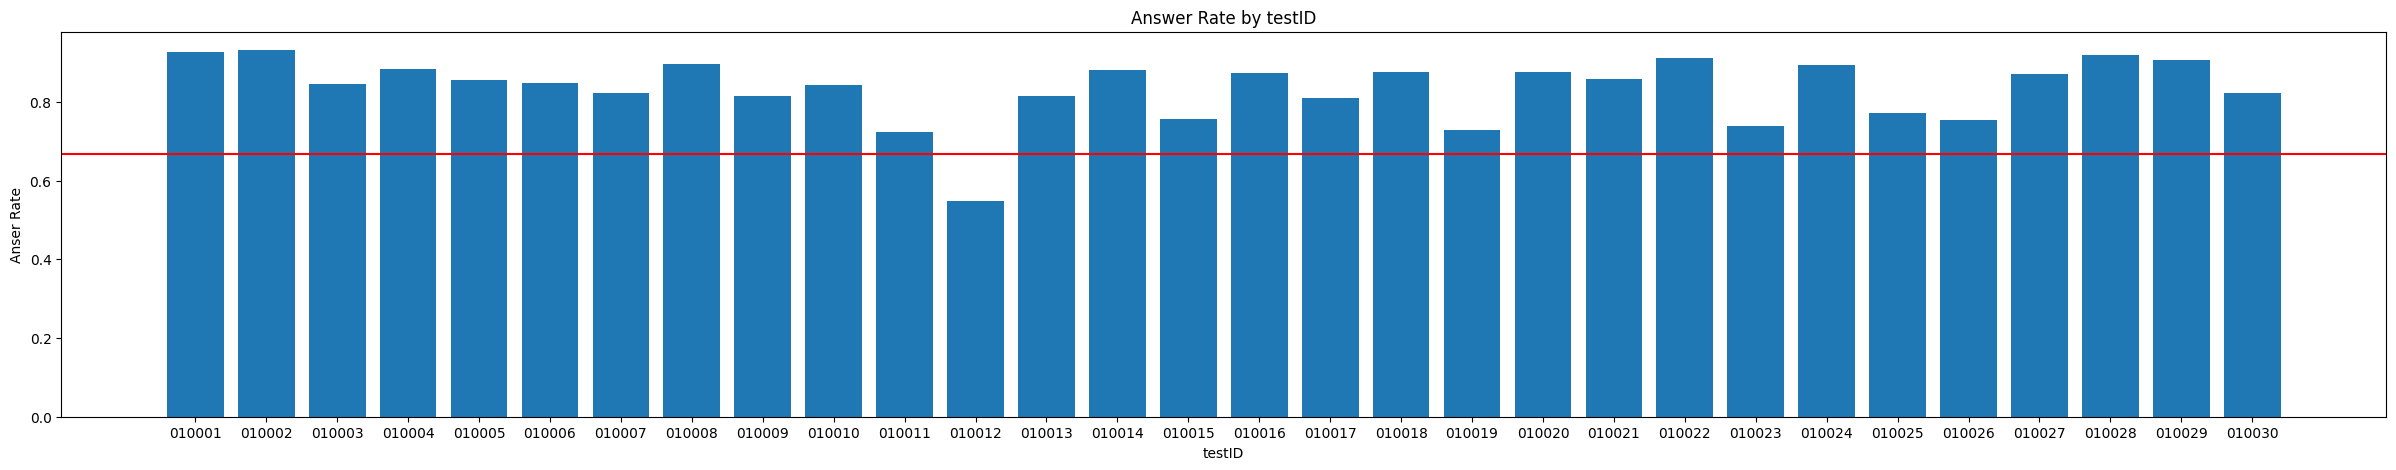

In [30]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(testID_groupby.index[:30], testID_groupby['answerCode'][:30])
ax.set_title('Answer Rate by testID')
ax.set_xlabel('testID')
ax.set_ylabel('Anser Rate')
ax.axhline(testID_groupby['answerCode'].mean(), color='red')
plt.show()

### testID 대분류 별 정답률

In [31]:
testID1_groupby = df.groupby('testID1').agg({
    'userID': 'count',
    'answerCode': percentile
})
testID1_groupby.describe()

,userID,answerCode
count,9.000000,9.000000
mean,251842.888889,0.640736
std,50564.904297,0.120048
min,119385.000000,0.449948
25%,264434.000000,0.521876
50%,268327.000000,0.684056
75%,273762.000000,0.709232
max,279164.000000,0.800876


In [32]:
testID1_groupby

,userID,answerCode
testID1,,
010,272082,0.800876
020,268327,0.737593
030,273762,0.702238
040,267323,0.684056
050,275773,0.658208
060,264434,0.709232
070,279164,0.521876
080,246336,0.502598
090,119385,0.449948


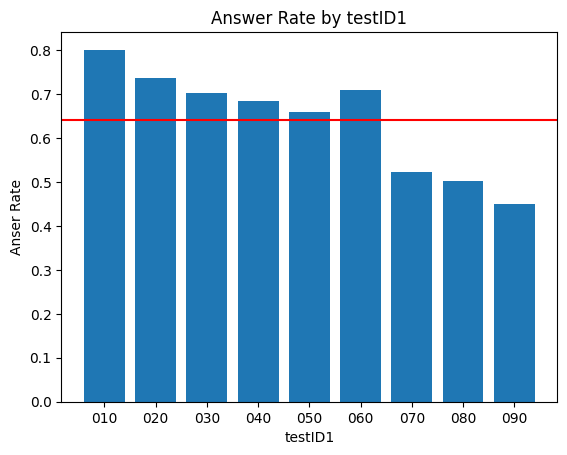

In [33]:
fig, ax = plt.subplots()
plt.bar(testID1_groupby.index, testID1_groupby['answerCode'])
ax.set_title('Answer Rate by testID1')
ax.set_xlabel('testID1')
ax.set_ylabel('Anser Rate')
ax.axhline(testID1_groupby['answerCode'].mean(), color='red')
plt.show()

### testID 소분류 별 정답률

In [34]:
testID2_groupby = df.groupby('testID2').agg({
    'userID': 'count',
    'answerCode': percentile
})
testID2_groupby.describe()

,userID,answerCode
count,198.000000,198.000000
mean,11447.404040,0.667781
std,3305.994004,0.065223
min,951.000000,0.529107
25%,10069.000000,0.617677
50%,12179.000000,0.662560
75%,13691.500000,0.704941
max,17739.000000,0.895706


In [35]:
testID2_groupby

,userID,answerCode
testID2,,
001,14911,0.710348
002,12390,0.774011
003,16970,0.626930
004,12332,0.678803
005,16325,0.617519
...,...,...
194,2596,0.694145
195,4417,0.835409
196,1304,0.895706


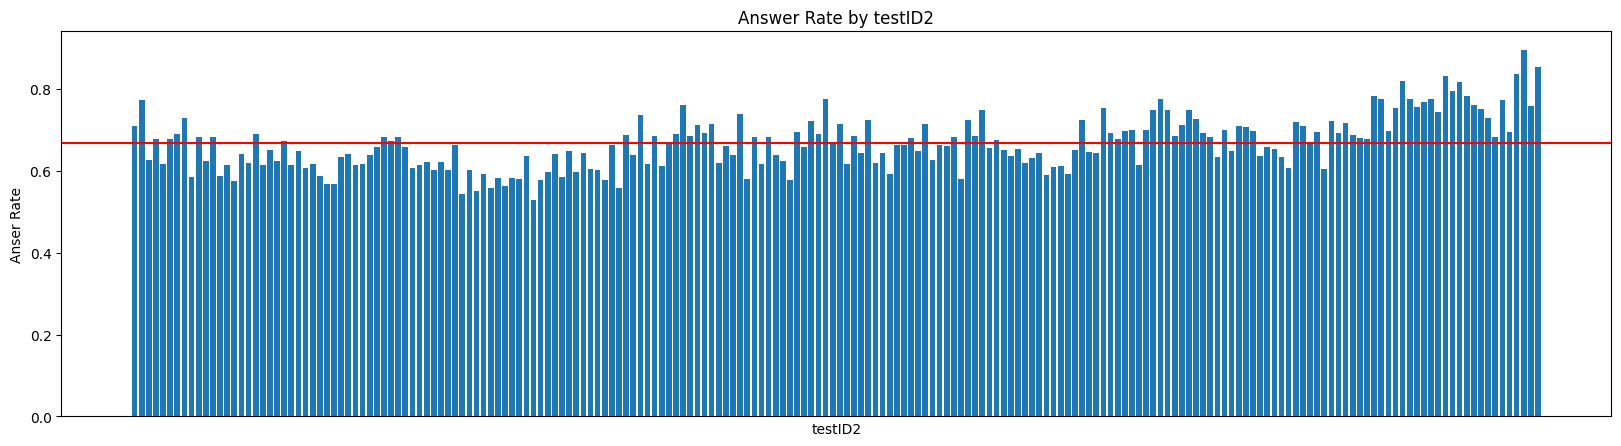

In [36]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(testID2_groupby.index, testID2_groupby['answerCode'])
ax.set_title('Answer Rate by testID2')
ax.set_xlabel('testID2')
ax.set_ylabel('Anser Rate')
ax.axhline(testID2_groupby['answerCode'].mean(), color='red')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

### testNum 별 정답률

In [37]:
testNum_groupby = df.groupby('testNum').agg({
    'userID': 'count',
    'answerCode': percentile
})
testNum_groupby.describe()

,userID,answerCode
count,13.000000,13.000000
mean,174352.769231,0.539218
std,169715.394259,0.151571
min,269.000000,0.200743
25%,5342.000000,0.480609
50%,127121.000000,0.527892
75%,369705.000000,0.663364
max,371755.000000,0.749916


In [38]:
testNum_groupby

,userID,answerCode
testNum,,
001,371755,0.749916
002,370972,0.720062
003,371640,0.687773
004,369705,0.663364
005,360607,0.599134
006,197772,0.555685
007,127121,0.515399
008,67150,0.457156
009,18417,0.481729


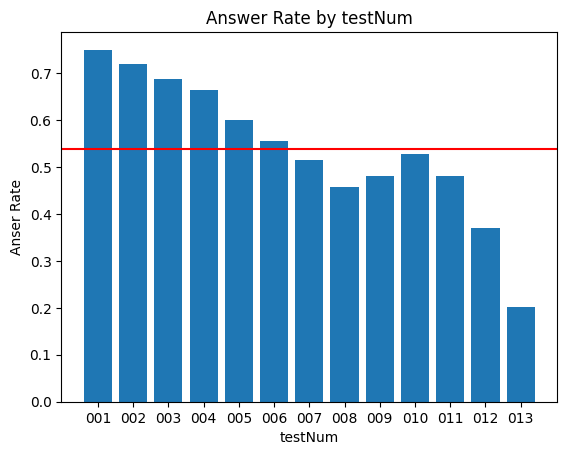

In [39]:
fig, ax = plt.subplots()
plt.bar(testNum_groupby.index, testNum_groupby['answerCode'])
ax.set_title('Answer Rate by testNum')
ax.set_xlabel('testNum')
ax.set_ylabel('Anser Rate')
ax.axhline(testNum_groupby['answerCode'].mean(), color='red')
plt.show()

### KnowledgeTag 별 정답률

In [40]:
KnowledgeTag_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count',
    'answerCode': percentile
})
KnowledgeTag_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


In [41]:
KnowledgeTag_groupby

,userID,answerCode
KnowledgeTag,,
1000,321,0.523364
1002,732,0.411202
1009,182,0.384615
1010,1668,0.452038
1011,699,0.463519
...,...,...
9926,88,0.397727
9927,1638,0.432845
9928,1384,0.494220


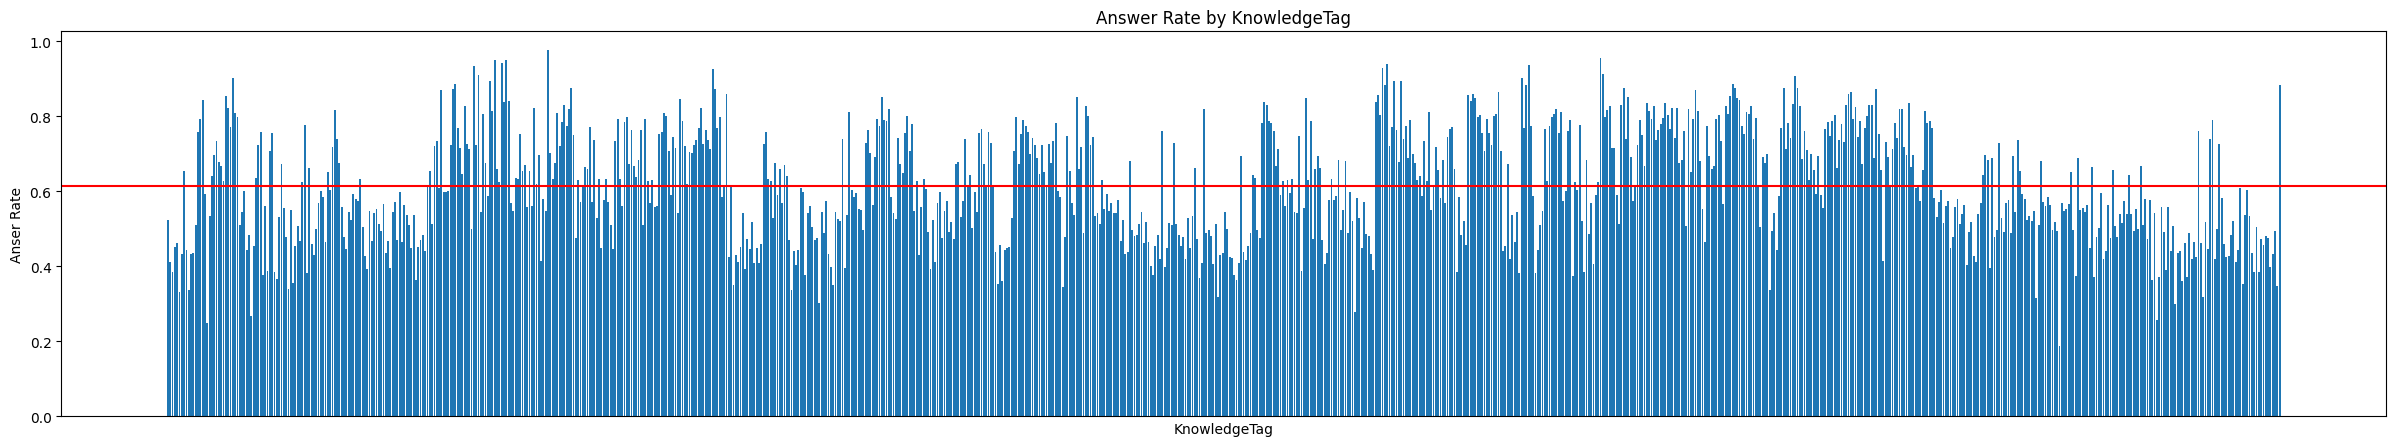

In [42]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(KnowledgeTag_groupby.index, KnowledgeTag_groupby['answerCode'])
ax.set_title('Answer Rate by KnowledgeTag')
ax.set_xlabel('KnowledgeTag')
ax.set_ylabel('Anser Rate')
ax.axhline(KnowledgeTag_groupby['answerCode'].mean(), color='red')
plt.gca().axes.xaxis.set_ticks([])
plt.show()

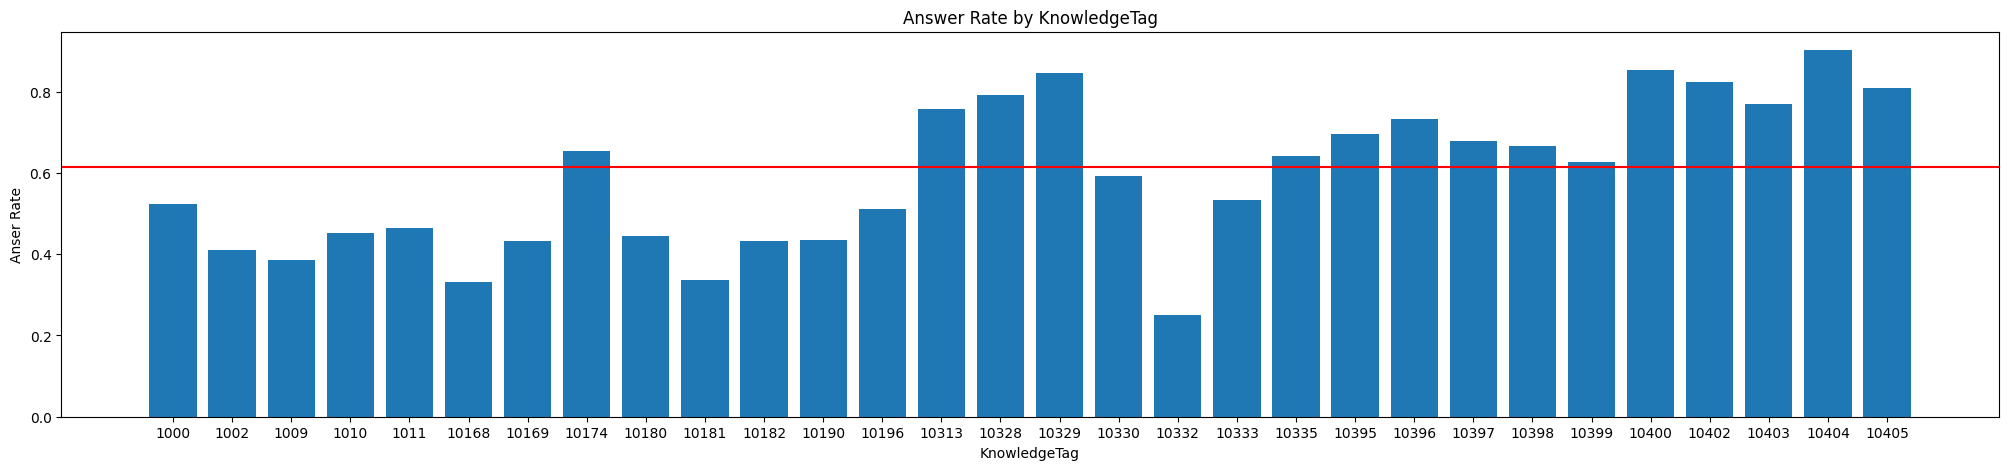

In [43]:
fig, ax = plt.subplots(figsize=(25, 5))
plt.bar(KnowledgeTag_groupby.index[:30], KnowledgeTag_groupby['answerCode'][:30])
ax.set_title('Answer Rate by KnowledgeTag')
ax.set_xlabel('KnowledgeTag')
ax.set_ylabel('Anser Rate')
ax.axhline(KnowledgeTag_groupby['answerCode'].mean(), color='red')
plt.show()